<a href="https://colab.research.google.com/github/KantareddySaiSandeep/NLP_TextClassification_user_ratings_Prediction/blob/master/Predict_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv('/content/drive/My Drive/train.csv')


In [0]:
test=pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
train.head(100)

,id,App Version Code,App Version Name,Review Text,Review Title,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5
5,2d55588b-085c-4f55-872b-460520855c93,71.0,2.30,Ghatiya app. Bill fetch nhi hota ..,NaN,1
6,87308f01-c741-4887-877f-4d42609761c3,74.0,2.33,They showed recharge successful but I didn't got,NaN,1
7,7048da41-474d-4a0a-9e1b-557e281bb2f3,71.0,2.30,This is good app for recharge and electric bil...,NaN,5
8,c73ec8cd-3f03-4f45-8b6f-f19b0fb786bc,78.0,2.37,Worst app i never had seen before,NaN,1
9,e2d6f61a-270c-4573-b7d0-229a81324ba9,53.0,2.13,Good,Liked,4


In [0]:
test.head()

,id,App Version Code,App Version Name,Review Text
0,bdcb3129-afc1-4608-825f-558fe9c17e2b,78.000000,2.370000,"Awesome app, all should use it"
1,7518d5c8-5e35-45e2-b29d-cf0996ba9e2f,75.000000,2.340000,how can i stop notification
2,b21ca913-ba44-471b-91e1-aaf035379a84,70.560382,2.277854,"This app is very easy to use , nice graphics ,..."
3,beaaa17d-44af-44c8-ba38-24ba54c3b17d,83.000000,2.420000,Quite good but felt slow response from cc. Ove...
4,89d8c4f0-6fe0-4389-b1f8-913ba894c0f1,74.000000,2.330000,Not getting otp for login since yesterday. Als...


In [0]:
train.shape

(5693, 5)

In [0]:
train.isnull().sum()

id                     0
App Version Code    1139
App Version Name    1139
Review Text            1
Review Title        5091
Star Rating            0
dtype: int64

In [0]:
test.isnull().sum()

id                     0
App Version Code     273
App Version Name     273
Review Text            1
Review Title        1244
dtype: int64

In [0]:
train.dtypes

id                   object
App Version Code    float64
App Version Name    float64
Review Text          object
Review Title         object
Star Rating           int64
dtype: object

In [0]:
train.values

array([['b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9', nan, nan,
        'Very bad wallet balance not use.', nan, 1],
       ['c7844e8f-56c1-487b-ae3e-df2fdf4c1767', 43.0, 2.3,
        'Froud app i recharge 199 but not done also send mail to niki even not replied',
        nan, 1],
       ['93ff57f7-9e02-4fa9-b779-3db82b8af0a4', 52.0, 2.12,
        'Waste to write comments also', 'Waste no use', 2],
       ...,
       ['2289f5fd-5556-49f8-ab4f-ba5e99a1a50f', 68.0, 2.27,
        "I'm already a Lazypay account holder using same for ticket booking , Online food order , bus ticket but here it's not showing then what's the use of it?",
        nan, 2],
       ['c11b87db-6e1d-4b52-ae1e-d759809ef2f0', 75.0, 2.34,
        "It's so easy to use, I'm just using and falling in love with this app, so many payment options to choose and offers are cheery on the top.",
        nan, 5],
       ['0a4c9a2a-8510-4e1d-a5ba-bd30afbac09a', nan, nan, 'Good', nan, 5]],
      dtype=object)

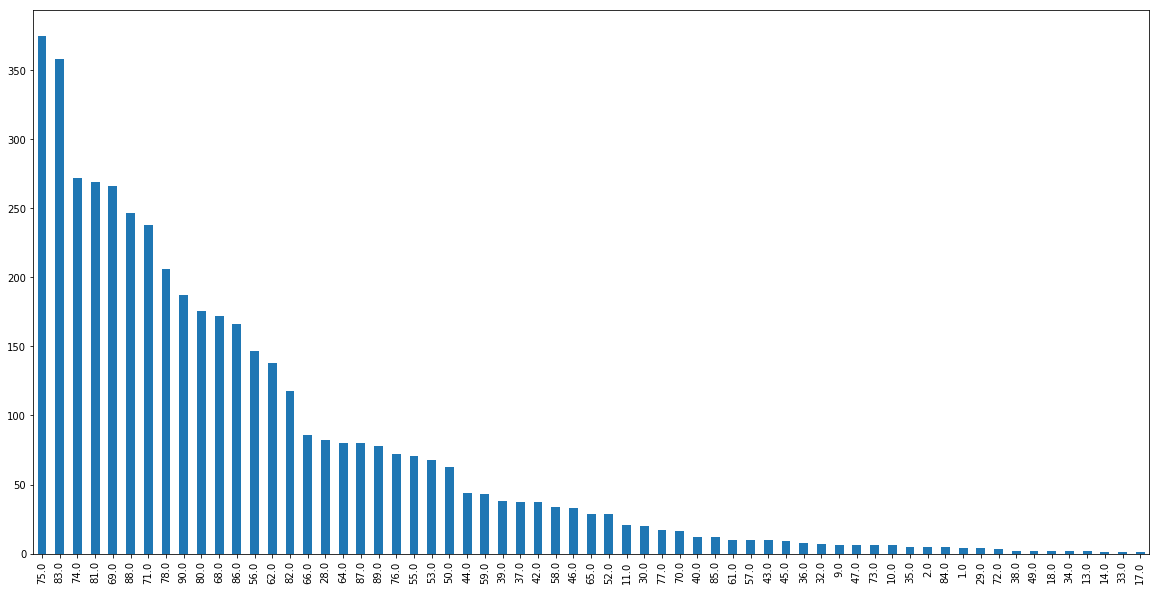

In [0]:
train['App Version Code'].value_counts().plot(kind='bar',figsize=(20,10))

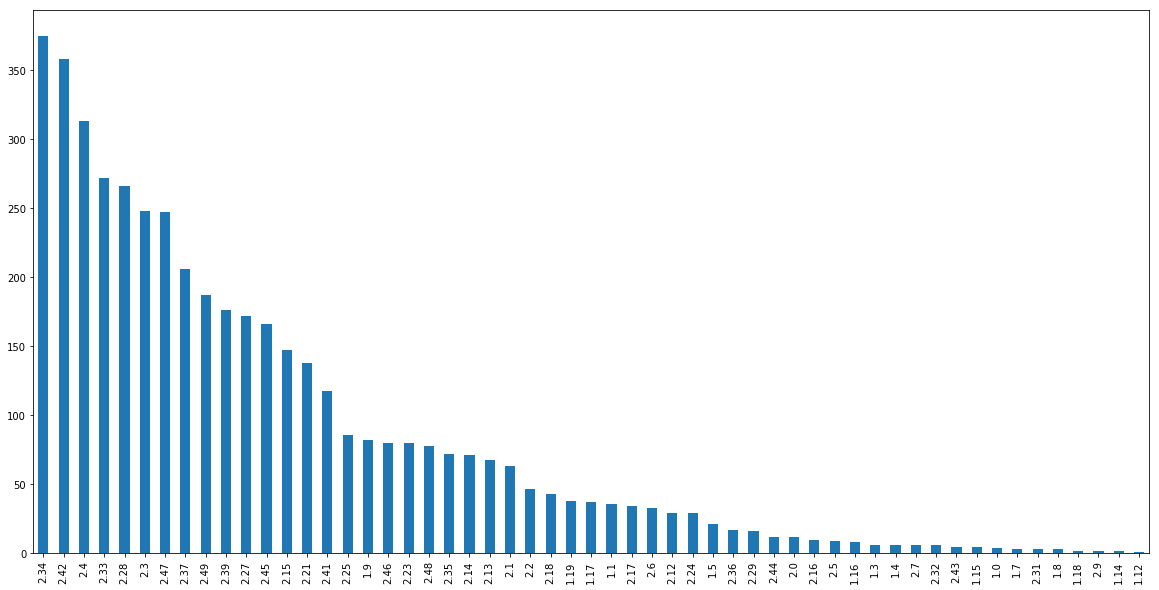

In [0]:
train['App Version Name'].value_counts().plot(kind='bar',figsize=(20,10))

In [0]:
train[(train['App Version Code']==75) & (train['Star Rating']==5)].shape

(207, 6)

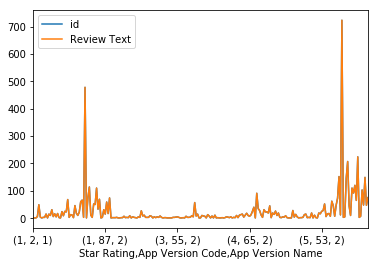

In [118]:
#fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['Star Rating','App Version Code','App Version Name']).count().plot()

In [0]:
train.drop('Review Title',1,inplace=True)

In [0]:
test.drop('Review Title',1,inplace=True)

In [110]:
train.head()

,id,App Version Code,App Version Name,Review Text,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,71,2,Very bad wallet balance not use.,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43,2,Froud app i recharge 199 but not done also sen...,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52,2,Waste to write comments also,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62,2,Nice apo,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69,2,Good nice app,5


In [123]:
test.head(10)

,id,App Version Code,App Version Name,Review Text
0,bdcb3129-afc1-4608-825f-558fe9c17e2b,78,2,"Awesome app, all should use it"
1,7518d5c8-5e35-45e2-b29d-cf0996ba9e2f,75,2,how can i stop notification
2,b21ca913-ba44-471b-91e1-aaf035379a84,70,2,"This app is very easy to use , nice graphics ,..."
3,beaaa17d-44af-44c8-ba38-24ba54c3b17d,83,2,Quite good but felt slow response from cc. Ove...
4,89d8c4f0-6fe0-4389-b1f8-913ba894c0f1,74,2,Not getting otp for login since yesterday. Als...
5,16e57197-186e-44ef-ac4c-6f6a13e787ee,37,1,What's different?
6,04a33480-0544-433d-af9d-e8c0777cadfb,83,2,This is very good but please provide some good...
7,5a5b705a-e3d8-4424-989c-05d078b6a461,70,2,"Excellent,but niki credit amount is only 25% used"
8,00aad18b-1960-464c-9334-0961a9f1d65c,75,2,Nice app
9,ce2a2f18-bfba-4430-afc5-be587a190d77,56,2,I didn't receive cashbook for first time DTH r...


In [122]:
df.head(10)

,Id,Star Rating
0,bdcb3129-afc1-4608-825f-558fe9c17e2b,5
1,7518d5c8-5e35-45e2-b29d-cf0996ba9e2f,2
2,b21ca913-ba44-471b-91e1-aaf035379a84,5
3,beaaa17d-44af-44c8-ba38-24ba54c3b17d,5
4,89d8c4f0-6fe0-4389-b1f8-913ba894c0f1,1
5,16e57197-186e-44ef-ac4c-6f6a13e787ee,5
6,04a33480-0544-433d-af9d-e8c0777cadfb,3
7,5a5b705a-e3d8-4424-989c-05d078b6a461,1
8,00aad18b-1960-464c-9334-0961a9f1d65c,5
9,ce2a2f18-bfba-4430-afc5-be587a190d77,1


In [0]:
ip install impyute

In [0]:
train['App Version Code'].fillna(train['App Version Code'].mean(),inplace=True)

In [0]:
test['App Version Code'].fillna(test['App Version Code'].mean(),inplace=True)

In [0]:
train['App Version Name'].fillna(train['App Version Name'].mean(),inplace=True)

In [0]:
test['App Version Name'].fillna(test['App Version Name'].mean(),inplace=True)

In [0]:
train.head()

,id,App Version Code,App Version Name,Review Text,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,71.250329,2.290832,Very bad wallet balance not use.,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.000000,2.300000,Froud app i recharge 199 but not done also sen...,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.000000,2.120000,Waste to write comments also,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.000000,2.210000,Nice apo,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.000000,2.280000,Good nice app,5


In [0]:
train.dropna(inplace=True)

In [0]:
test.dropna(inplace=True)

In [0]:
train.isnull().sum()

id                  0
App Version Code    0
App Version Name    0
Review Text         0
Star Rating         0
dtype: int64

In [0]:
test.isnull().sum()

id                  0
App Version Code    0
App Version Name    0
Review Text         0
dtype: int64

In [0]:
X=train['Review Text']
vectorizer = CountVectorizer()
vectorizer.fit(X)
print(vectorizer.vocabulary_)

{'very': 4737, 'bad': 709, 'wallet': 4786, 'balance': 731, 'not': 3057, 'use': 4674, 'froud': 1955, 'app': 575, 'recharge': 3580, '199': 115, 'but': 962, 'done': 1549, 'also': 508, 'send': 3977, 'mail': 2773, 'to': 4475, 'niki': 3040, 'even': 1711, 'replied': 3714, 'waste': 4799, 'write': 4917, 'comments': 1164, 'nice': 3030, 'apo': 574, 'good': 2052, 'ghatiya': 2020, 'bill': 847, 'fetch': 1841, 'nhi': 3026, 'hota': 2251, 'they': 4406, 'showed': 4026, 'successful': 4237, 'didn': 1488, 'got': 2065, 'this': 4418, 'is': 2448, 'for': 1903, 'and': 536, 'electric': 1645, 'payment': 3225, 'worst': 4903, 'never': 3019, 'had': 2116, 'seen': 3967, 'before': 790, 'superb': 4263, 'selecting': 3971, 'upw': 4665, 'as': 615, 'circle': 1115, 'it': 2462, 'only': 3117, 'shows': 4029, 'karnataka': 2538, 'or': 3142, 'mumbai': 2969, 'refer': 3634, 'hum': 2273, 'kar': 2536, 'hi': 2209, 'nahi': 2980, 'payenge': 3220, 'aapke': 383, 'product': 3408, 'ke': 2545, 'liye': 2698, 'jbl': 2495, 'earphone': 1614, 'app

In [0]:
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
    (['App Version Code','App Version Name'], None),
    ('Review Text',TfidfVectorizer()),('id',TfidfVectorizer())
])
X=mapper.fit_transform(train)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [0]:
Y=mapper.transform(test)

In [32]:
Y.shape

(1423, 29145)

In [24]:
X.shape

(5692, 29145)

In [0]:
train.dtypes

id                   object
App Version Code    float64
App Version Name    float64
Review Text          object
Star Rating           int64
dtype: object

In [0]:
y=train['Star Rating']

In [0]:
X.shape

(5692, 29145)

In [0]:
combined=pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
combined.shape

(7115, 5)

In [0]:
train.head()

,id,App Version Code,App Version Name,Review Text,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,71.250329,2.290832,Very bad wallet balance not use.,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.000000,2.300000,Froud app i recharge 199 but not done also sen...,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.000000,2.120000,Waste to write comments also,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.000000,2.210000,Nice apo,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.000000,2.280000,Good nice app,5


In [62]:
train.dtypes

id                  object
App Version Code     int64
App Version Name     int64
Review Text         object
Star Rating          int64
dtype: object

In [0]:
train['App Version Code']=train['App Version Code'].apply(np.int64)
train['App Version Name']=train['App Version Name'].apply(np.int64)

In [60]:
test.dtypes

id                  object
App Version Code     int64
App Version Name     int64
Review Text         object
dtype: object

In [0]:
test['App Version Code']=test['App Version Code'].apply(np.int64)
test['App Version Name']=test['App Version Name'].apply(np.int64)

In [0]:
combined.isnull().sum()

App Version Code       0
App Version Name       0
Review Text            0
Star Rating         1423
id                     0
dtype: int64

In [0]:
features = ['id','App Version Code','App Version Name', 'Review Text']
target = ['Star Rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=101)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
rfc = DecisionTreeClassifier()
rfc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Testing the model
predictions = rfc.predict(Y)

In [0]:
predictions = rfc.predict(X_test)

In [75]:
predictions

array([5, 2, 5, ..., 5, 1, 1])

In [0]:
data={'Id':test['id'],'Star Rating':predictions}
df=pd.DataFrame(data)
df.to_csv('/content/drive/My Drive/predictions.csv')

In [99]:
f1_score(y_test, predictions,average='macro')

1.0

In [100]:
f1_score(y_test, predictions,average='micro')

1.0